In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg

from PIL import Image
import glob

Populating the interactive namespace from numpy and matplotlib


In [19]:
def load_image(image):
    #each image is loaded --> resize --> vectorize --> store into a matrix T
    starter = Image.open(image)
    im_resize = resize_image(starter)
    im_vector = vectorize_image(im_resize)
    #create a column vector
    im_vector = im_vector.reshape((im_vector.size,1))
    #store into a big matrix
    return im_vector
        
def resize_image(image):
    #resize by a factor 16
    im_resize = image.resize(((image.size[0]/4),(image.size[1]/4)))
    return im_resize

def vectorize_image(image):
    #convert teh image into an array
    im_arr = np.array(image)
    im_flat = im_arr.ravel()
    
    return im_flat


In [22]:
#find all the images to open in a cycle
#pass each image to load_image
#return the vectorize image, thus np.c_[i-1,i] to concatenate all the vectors
#at first we need to keep trak of a vector if counter==1 : np.c_[tmp,new] and then just np.c_[existing,new]

counter = 0 
for root,dirs,files in os.walk(os.getcwd()):
    #find all the file images
    #if pgm is teh extension and ambient is not in the name
    for f in files:
        if "pgm" in f:
            if "Ambient" in f:
                continue
            else:
                #create the path
                im_path = root + "/" + f
                #load the image
                image = load_image(im_path)
                #this is the image vector store
                if counter == 0 :
                    tmp = image
                    counter+=1
                else:
                    #now combine the picture
                    c = np.c_[tmp,image]
                    tmp = c # so the temporary will be the matrix
                    
                




In [ ]:
def reconstruct_image(matrix):
    #each  column is an image
    

In [122]:
# normalize all the images by subtracting the average of the rows
mean = c.mean(1)
new_c = c.copy()  #get rid of this method then
for i in range(c.shape[0]):
    new_c[i] = new_c[i] - mean[i]

    
    

In [71]:
#compute the covariance matrix
svar = np.cov(new_c)
#compute eigenvalue and vectors
val,vect = np.linalg.eigh(svar)
#select the first 40 eigenvalues and vectors
selec_val = val[0:40]
select_vect = vect[0:40]

ValueError: total size of new array must be unchanged

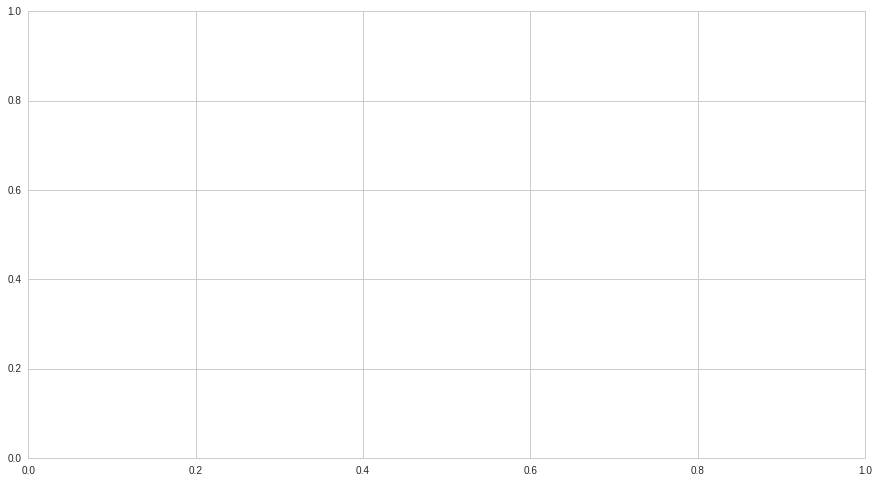

In [126]:
for  i in range(0,40):
    select_vect[i] = 255*(select_vect[i] - min(select_vect[i])/(max(select_vect[i])-min(select_vect[i])))

#new_c = np.reshape(mean,[42,48])

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

first_vect = np.reshape(select_vect,[42,48])
ax.imshow(d)
#ax.imshow(first_vect)
